In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
wine = pd.read_csv('https://bit.ly/wine-date')
wine.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [15]:
y = wine['class']
x = wine.drop('class', axis=1)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.2, random_state=111)

In [17]:
x_sub_train, x_val, y_sub_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=41)

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_sub_train, y_sub_train)

DecisionTreeClassifier()

In [21]:
tree.score(x_val, y_val)

0.8480769230769231

In [ ]:
# cross_validation

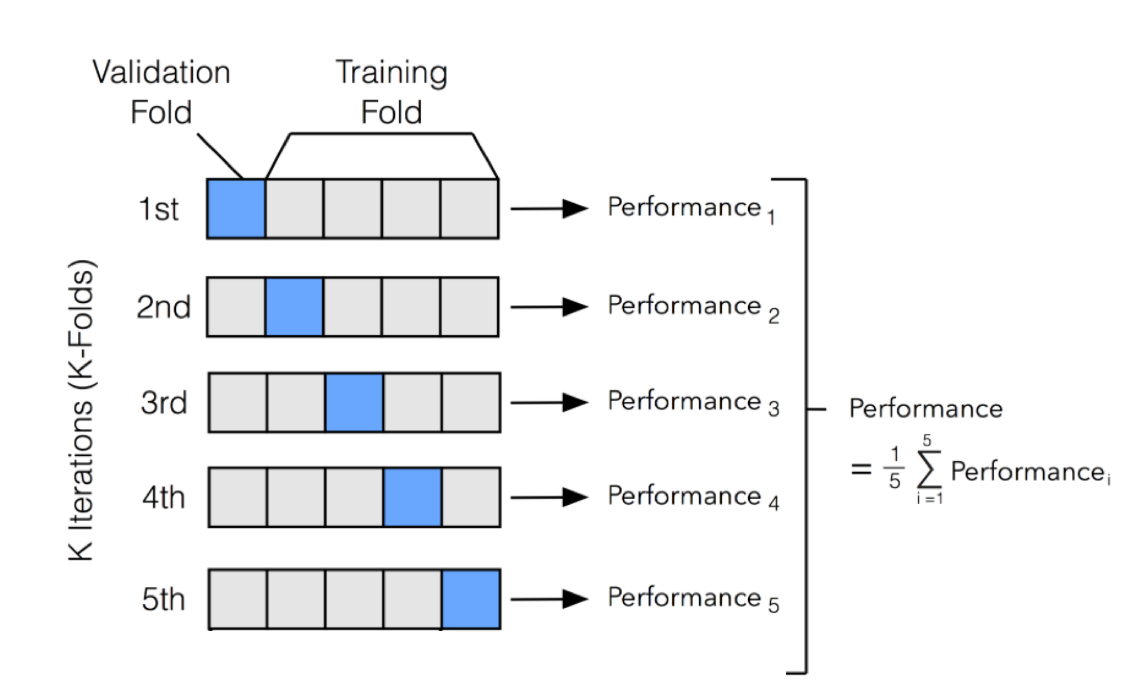

In [22]:
from IPython.display import Image
Image('cross_validation.png')

In [23]:
from sklearn.model_selection import cross_validate
tree = DecisionTreeClassifier()
scores = cross_validate(tree, x_train, y_train)
scores

{'fit_time': array([0.00897479, 0.00952816, 0.00800633, 0.00897503, 0.00836039]),
 'score_time': array([0.00299287, 0.00243926, 0.00196743, 0.00335193, 0.00199032]),
 'test_score': array([0.8375    , 0.85384615, 0.86333013, 0.86429259, 0.85851781])}

In [24]:
scores['test_score']

array([0.8375    , 0.85384615, 0.86333013, 0.86429259, 0.85851781])

In [25]:
np.mean(scores['test_score'])

0.8554973347153328

In [26]:
# GridSearchCV

In [27]:
tree = DecisionTreeClassifier()

In [29]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [30]:
gs = GridSearchCV(tree, params, n_jobs=-1)

In [31]:
gs.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [32]:
gs.best_params_

{'min_impurity_decrease': 0.0001}

In [34]:
gs.best_score_

0.8695428296438884

In [36]:
gs.cv_results_['mean_test_score']

array([0.86954283, 0.86877193, 0.86473144, 0.8639622 , 0.8641547 ])

In [37]:
np.mean(gs.cv_results_['mean_test_score'])

0.8662326201228993

In [38]:
params = {'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
         'max_depth': range(5, 20, 1),
         'min_samples_split': range(2,100,10)}

In [44]:
5*15*10

750

In [39]:
gs = GridSearchCV(tree, params, n_jobs=-1)
gs.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005],
                         'min_samples_split': range(2, 100, 10)})

In [40]:
gs.best_params_

{'max_depth': 18, 'min_impurity_decrease': 0.0002, 'min_samples_split': 2}

In [41]:
gs.best_score_

0.8681951950840304

In [43]:
len(gs.cv_results_['mean_test_score'])

750

In [45]:
np.max(gs.cv_results_['mean_test_score'])

0.8681951950840304

In [46]:
# 랜덤 서치

In [47]:
from scipy.stats import uniform, randint

In [49]:
rgen = randint(0,10)
rgen.rvs(10)

array([1, 8, 6, 7, 7, 7, 2, 0, 8, 7])

In [52]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 96, 110,  87,  88,  91, 101, 105, 102, 115, 105], dtype=int64))

In [53]:
ugen = uniform(0,1)
ugen.rvs(10)

array([0.6619694 , 0.23357837, 0.62635489, 0.29912826, 0.88997073,
       0.48068452, 0.01205257, 0.13851881, 0.85643655, 0.58213202])

In [69]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
         'max_depth' :randint(5,50),
         'min_samples_split':randint(2,25),
         'min_samples_leaf':randint(1,25)}

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
gs = RandomizedSearchCV(tree, params, n_iter=10000, n_jobs=-1, random_state=42)
gs.fit(x_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=10000, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000246DDF82460>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000246DE065EB0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000246DE0657C0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000246DDF73070>},
                   random_state=42)

In [76]:
gs.best_params_

{'max_depth': 8,
 'min_impurity_decrease': 0.0002282245092396701,
 'min_samples_leaf': 9,
 'min_samples_split': 11}

In [77]:
gs.best_score_

0.8676162360257644

In [78]:
gs.score(x_test, y_test)

0.8723076923076923